
*check if there are highly correlated features and drop them if there are any.
One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. (  Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [2]:

df_1 = pd.read_csv(r"C:\Users\User\Documents\GitHub\Iron-Moran-\Data_Marketing_Customer_Analysis_Round3.csv")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [3]:
df_1

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


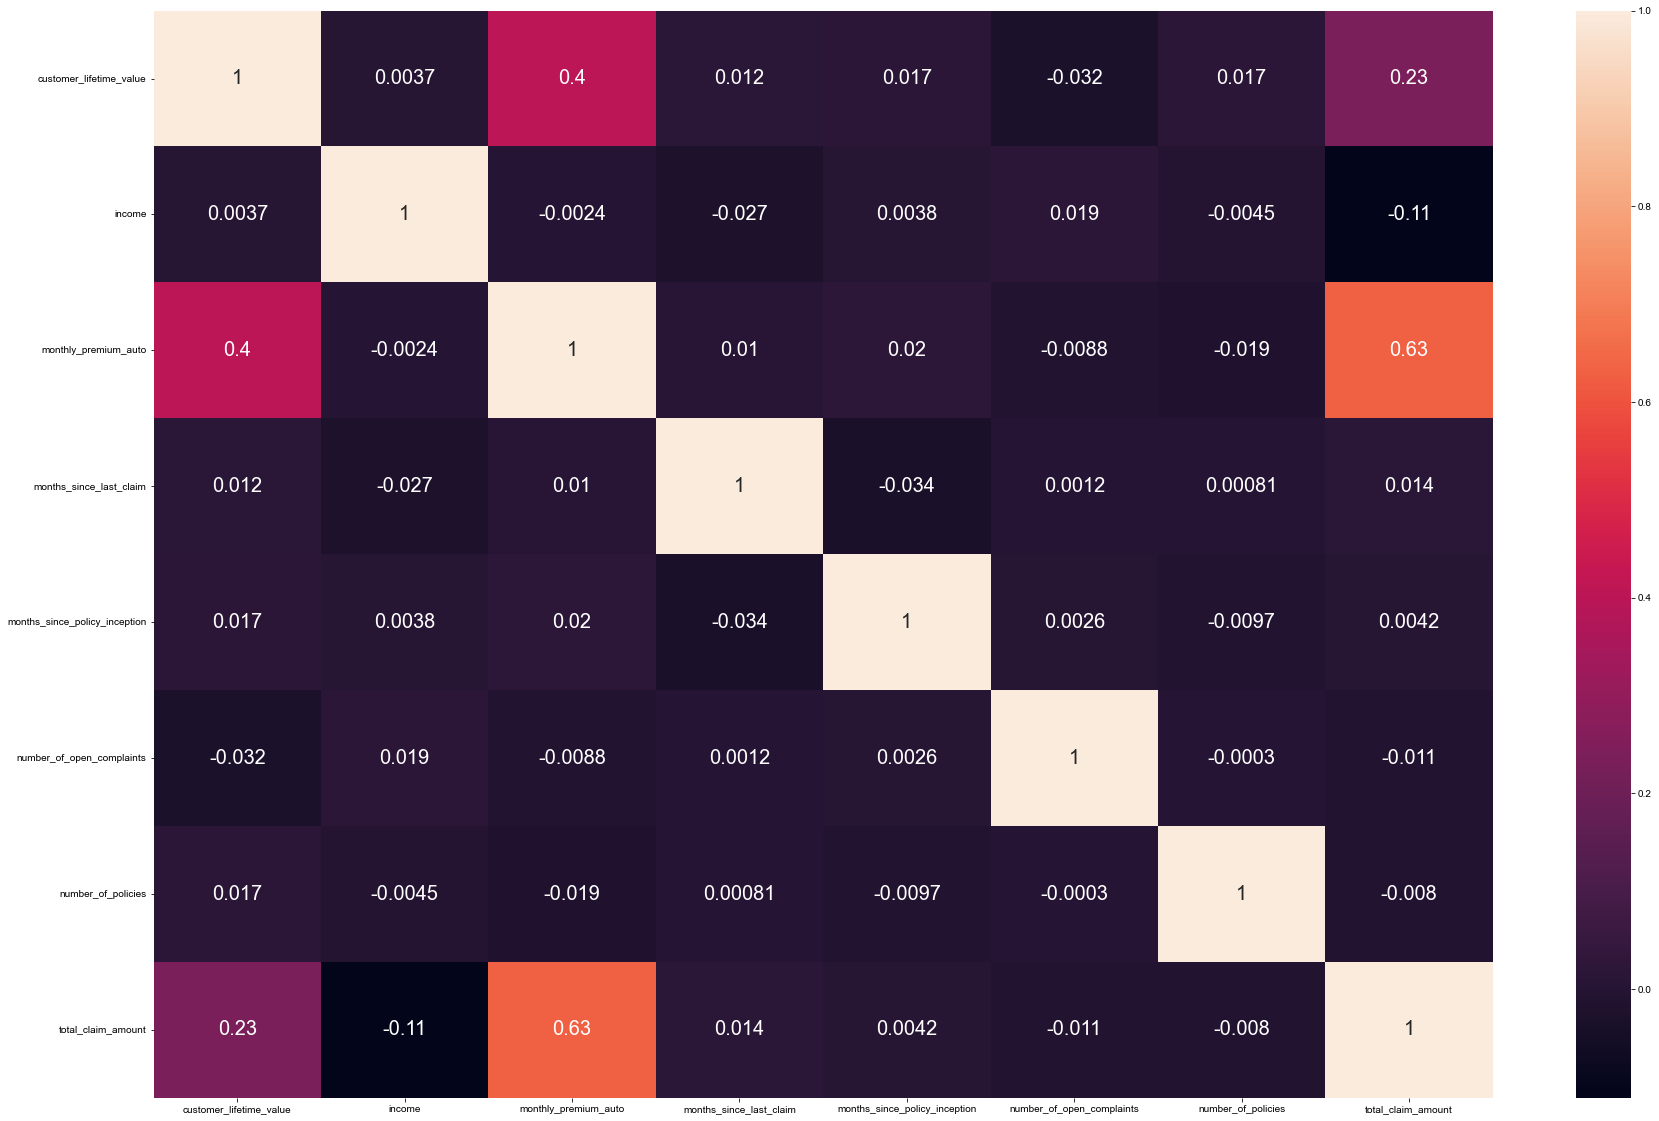

In [4]:
fig1=plt.figure(figsize=(30,20))
sns.heatmap(df_1.corr(),annot_kws={"size":20},annot=True)
sns.set(font_scale=5)

In [5]:
df_cat= df_1.select_dtypes(include='object')
df_numerical = df_1.select_dtypes(include='int64')

# Labeling the column using dummies

In [6]:
df_cat1=pd.get_dummies(df_cat[:])

In [7]:
df=pd.concat([df_cat1,df_numerical],axis=1) 
df

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1,0,0,0,1,0,1,0,0,0,...,1,0,4809,48029,61,7,52,0,9,292
1,0,0,0,1,1,0,1,0,0,0,...,1,0,2228,92260,64,3,26,0,1,744
2,0,1,0,0,1,0,1,0,0,1,...,1,0,14947,22139,100,34,31,0,2,480
3,0,0,1,0,0,1,0,1,0,0,...,1,0,22332,49078,97,10,3,0,2,484
4,0,0,1,0,1,0,0,0,1,1,...,1,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,15563,61541,253,12,40,0,7,1214
10685,0,0,1,0,1,0,1,0,0,0,...,1,0,5259,61146,65,7,68,0,6,273
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,23893,39837,201,11,63,0,2,381
10687,0,0,0,1,1,0,0,0,1,0,...,1,0,11971,64195,158,0,27,4,6,618


# X-y split (y is the target variable, which is the total claim amount)


In [8]:
x=df.drop('total_claim_amount', axis=1)
y=df.total_claim_amount
x

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,4809,48029,61,7,52,0,9
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,2228,92260,64,3,26,0,1
2,0,1,0,0,1,0,1,0,0,1,...,0,1,0,14947,22139,100,34,31,0,2
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,22332,49078,97,10,3,0,2
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,0,1,0,15563,61541,253,12,40,0,7
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,5259,61146,65,7,68,0,6
10686,1,0,0,0,1,0,0,1,0,1,...,0,1,0,23893,39837,201,11,63,0,2
10687,0,0,0,1,1,0,0,0,1,0,...,0,1,0,11971,64195,158,0,27,4,6


# Train-test split.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=123)


# Standardize the data 

In [10]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)


In [11]:
x_test_scaled=std_scaler.transform(x_test)

In [12]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     235.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:28:38   Log-Likelihood:                -47641.
No. Observations:                7482   AIC:                         9.549e+04
Df Residuals:                    7376   BIC:                         9.623e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.1562      1.985    218.211      0.0